In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
from PIL import Image
import heapq
import PIL

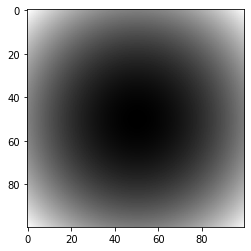

In [2]:
image = np.zeros((100, 100))


#create a image where the center is dark and the edges are light, but it's a circle
for i in range(100):
    for j in range(100):
        image[i,j] = (i-50)**2 + (j-50)**2

        
        
plt.imshow(image, cmap='gray')

#save image to a file
plt.imsave('test.png', image, cmap='gray')


In [3]:
def get_neighbors(i,j,image):
    neighbors = []
    xmin = 0
    xmax = len(image[0])
    ymin = 0
    ymax = len(image)

    if i > 0:
        neighbors.append((i-1,j))
    if i < xmax-1:
        neighbors.append((i+1,j))
    if j > 0:
        neighbors.append((i,j-1))
    if j < ymax-1:
        neighbors.append((i,j+1))
    if i > 0 and j > 0:
        neighbors.append((i-1,j-1))
    if i > 0 and j < ymax-1:
        neighbors.append((i-1,j+1))
    if i < xmax-1 and j > 0:
        neighbors.append((i+1,j-1))
    if i < xmax-1 and j < ymax-1:
        neighbors.append((i+1,j+1))
        
    return neighbors


In [4]:
def level_trace(x,y,image):
    visited = set()
    visited.add((x,y))
    og_value = image[x,y]
    start = (x,y)
    curr_pixel = (x,y)
    i = 0
    while True:
        neighbors = get_neighbors(curr_pixel[0],curr_pixel[1],image)
        neighbors = [x for x in neighbors if x not in visited]
        #get the neighbor that is most similar to the current pixel
        neighbors = sorted(neighbors, key=lambda x: np.abs(image[x[0],x[1]] - og_value))
        # try:
        if len(neighbors) > 0:
            curr_pixel = neighbors[0]
            visited.add(curr_pixel)
            i += 1
        else:
            break

        visited.add(curr_pixel)
        if i == 1:
            visited.remove(start)
        i +=1
        if curr_pixel == start:
            break
    return visited

9
(26, 24)


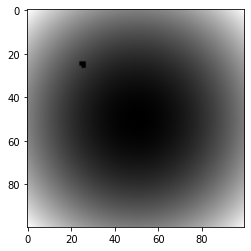

In [22]:
def get_initial_threshold(x,y,image):
    neighbors = get_neighbors(x,y,image)
    neighbors = [image[x[0],x[1]] for x in neighbors]
    return np.median(neighbors)


image = np.zeros((100, 100))


#create a image where the center is dark and the edges are light, but it's a circle
for i in range(100):
    for j in range(100):
        image[i,j] = (i-50)**2 + (j-50)**2


threshold = get_initial_threshold(50,50,image)



def get_group(x,y,image,threshold):
    visited = set()
    visited.add((x,y))
    candidates = set()
    candidates.add((x,y))

    neighbors = get_neighbors(x,y,image)
    neighbors = [x for x in neighbors if x not in visited]

    candidates.update(neighbors)

    while len(candidates) > 0:
        curr_pixel = candidates.pop()
        visited.add((curr_pixel[0],curr_pixel[1]))

        if image[curr_pixel] < threshold:
            neighbors = get_neighbors(curr_pixel[0], curr_pixel[1],image)
            neighbors = [x for x in neighbors if x not in visited]
            candidates.update(neighbors)
    return visited



out = get_group(25,25,image,threshold)
print(len(out))
print(out.pop())
for i in out:
    image[i] = 0




plt.imshow(image, cmap='gray')


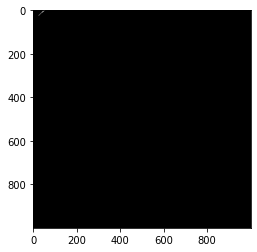